# Install VADER
[vaderSentiment](https://github.com/cjhutto/vaderSentiment)

`>pip install vaderSentiment`

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Trump approval rating
Trump approval rating data gathered from [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/trump-approval-ratings), under the [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

In [2]:
df = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_topline.csv')
#change `modeldate` data type to datetime.date
for index,row in df.iterrows():
    df.at[index,'modeldate'] = datetime.strptime(row['modeldate'], '%m/%d/%Y').date()
df.head(10)

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,2018-04-06,41.33928,45.64188,37.03668,54.03215,57.90473,50.15958,09:35:51 6 Apr 2018
1,Donald Trump,Adults,2018-04-06,39.40700,42.91302,35.90098,54.10432,58.29636,49.91229,09:35:41 6 Apr 2018
2,Donald Trump,All polls,2018-04-06,40.24438,44.88550,35.60326,53.81516,57.86983,49.76049,09:35:30 6 Apr 2018
3,Donald Trump,Voters,2018-04-05,41.30740,45.55830,37.05650,54.02983,57.90530,50.15437,14:01:52 5 Apr 2018
4,Donald Trump,Adults,2018-04-05,39.40700,42.91302,35.90098,54.10432,58.29636,49.91229,14:01:42 5 Apr 2018
5,Donald Trump,All polls,2018-04-05,40.22276,44.79292,35.65260,53.80377,57.85802,49.74953,14:01:31 5 Apr 2018
6,Donald Trump,All polls,2018-04-04,40.30183,45.00934,35.59433,53.75499,57.90125,49.60874,22:10:31 4 Apr 2018
7,Donald Trump,Adults,2018-04-04,39.37093,42.79845,35.94341,54.10816,58.35041,49.86591,22:10:42 4 Apr 2018
8,Donald Trump,Voters,2018-04-04,41.36893,45.80077,36.93710,54.05376,58.07210,50.03542,22:10:52 4 Apr 2018
9,Donald Trump,Voters,2018-04-03,41.39609,45.58278,37.20940,53.92669,57.81366,50.03971,17:25:50 3 Apr 2018


We want the daily approval estimate from all polls.

In [3]:
approval_estimates = df[df['subgroup'] == 'All polls'][['modeldate','approve_estimate']]
approval_estimates.head()

,modeldate,approve_estimate
2,2018-04-06,40.24438
5,2018-04-05,40.22276
6,2018-04-04,40.30183
11,2018-04-03,40.39435
14,2018-04-02,40.62948


# Sentiment analysis of Trump's tweets
[Trump tweet analysis by NPR Apps](https://github.com/nprapps/trump-tweet-analysis/blob/master/trump-tweets.ipynb)

[What We Learned About The Mood Of Trump's Tweets](https://www.npr.org/2017/04/30/526106612)

The code below downloads a `.zip` of Trump tweets from an [archive](https://github.com/bpb27/trump_tweet_data_archive) updated every hour.

In [20]:
import requests
import zipfile
import io

response = requests.get('https://github.com/bpb27/trump_tweet_data_archive/raw/master/condensed_2018.json.zip')
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall('data')

Load the JSON data into a DataFrame.

In [4]:
with open('data/condensed_2018.json') as f:
    jsondata = json.load(f)

tweets = pd.read_json('data/condensed_2018.json')
tweets.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2018-03-29 20:06:37,77534,979449770640015360,NaN,False,20072,Twitter for iPhone,Washington spent trillions building up foreign...
1,2018-03-29 19:58:35,54539,979447750529110016,NaN,False,13529,Twitter for iPhone,"JOBS, JOBS, JOBS! Unemployment claims have fal..."
2,2018-03-29 19:44:06,56138,979444104923840512,NaN,False,12922,Twitter for iPhone,We are going to REBUILD our crumbling infrastr...
3,2018-03-29 11:57:38,112077,979326715272065024,NaN,False,29771,Twitter for iPhone,I have stated my concerns with Amazon long bef...
4,2018-03-28 21:31:54,41557,979108846408003584,25073877.0,False,8840,Twitter for iPhone,"....In the interim, Hon. Robert Wilkie of DOD ..."


## Processing the data

For each tweet, run sentiment analysis on the text. Descriptions of the sentiment scores can be found [here](https://github.com/cjhutto/vaderSentiment#about-the-scoring).

In [5]:
analyzer = SentimentIntensityAnalyzer()

for index,row in tweets.iterrows():
    text = row['text']
    vs = analyzer.polarity_scores(text)
    tweets.at[index,'neg'] = vs['neg']
    tweets.at[index,'neu'] = vs['neu']
    tweets.at[index,'pos'] = vs['pos']
    tweets.at[index,'compound'] = vs['compound']
    
tweets.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,neg,neu,pos,compound
0,2018-03-29 20:06:37,77534,979449770640015360,NaN,False,20072,Twitter for iPhone,Washington spent trillions building up foreign...,0.051,0.862,0.087,0.3647
1,2018-03-29 19:58:35,54539,979447750529110016,NaN,False,13529,Twitter for iPhone,"JOBS, JOBS, JOBS! Unemployment claims have fal...",0.297,0.552,0.151,-0.4559
2,2018-03-29 19:44:06,56138,979444104923840512,NaN,False,12922,Twitter for iPhone,We are going to REBUILD our crumbling infrastr...,0.040,0.772,0.188,0.8516
3,2018-03-29 11:57:38,112077,979326715272065024,NaN,False,29771,Twitter for iPhone,I have stated my concerns with Amazon long bef...,0.117,0.850,0.034,-0.4962
4,2018-03-28 21:31:54,41557,979108846408003584,25073877.0,False,8840,Twitter for iPhone,"....In the interim, Hon. Robert Wilkie of DOD ...",0.000,0.747,0.253,0.8697


Add daily approval estimates to each tweet.

In [6]:
for index,row in tweets.iterrows():
    date = row['created_at'].date()
    approval = approval_estimates[approval_estimates['modeldate'] == date].iloc[0].loc['approve_estimate']
    tweets.at[index,'approval'] = approval/100.0
tweets.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,neg,neu,pos,compound,approval
0,2018-03-29 20:06:37,77534,979449770640015360,NaN,False,20072,Twitter for iPhone,Washington spent trillions building up foreign...,0.051,0.862,0.087,0.3647,0.402167
1,2018-03-29 19:58:35,54539,979447750529110016,NaN,False,13529,Twitter for iPhone,"JOBS, JOBS, JOBS! Unemployment claims have fal...",0.297,0.552,0.151,-0.4559,0.402167
2,2018-03-29 19:44:06,56138,979444104923840512,NaN,False,12922,Twitter for iPhone,We are going to REBUILD our crumbling infrastr...,0.040,0.772,0.188,0.8516,0.402167
3,2018-03-29 11:57:38,112077,979326715272065024,NaN,False,29771,Twitter for iPhone,I have stated my concerns with Amazon long bef...,0.117,0.850,0.034,-0.4962,0.402167
4,2018-03-28 21:31:54,41557,979108846408003584,25073877.0,False,8840,Twitter for iPhone,"....In the interim, Hon. Robert Wilkie of DOD ...",0.000,0.747,0.253,0.8697,0.401911


Plot positive sentiment and approval estimates of Trump's last 100 tweets.

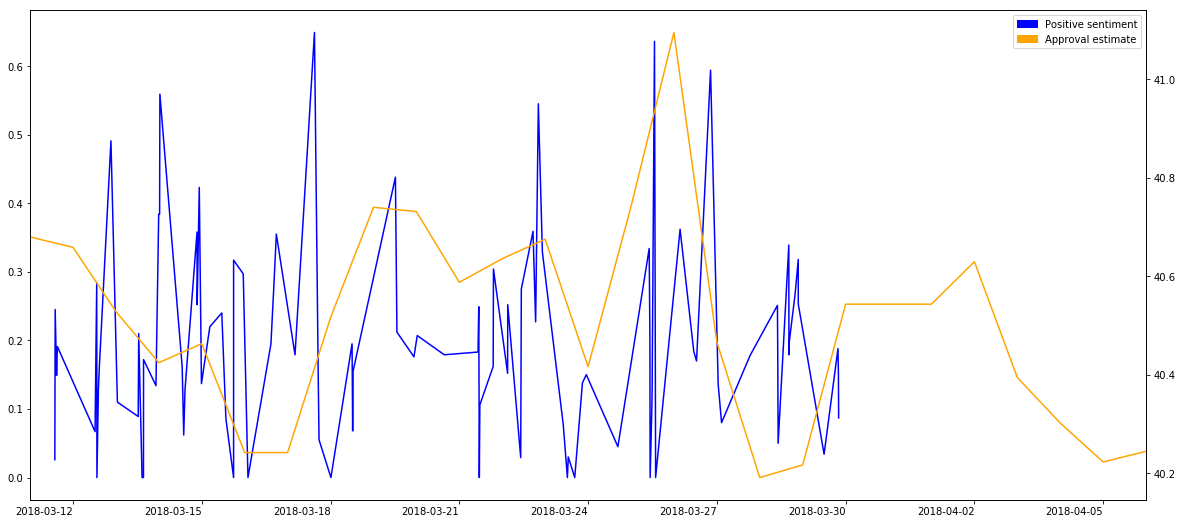

In [7]:
tweets_l00 = tweets[:100]

#positive sentiment of tweets
tweets_l00 = tweets_l00.rename(tweets_l00['created_at'])['pos']
plt.figure()
tweets_l00.plot(figsize=(20,10), color='blue')

#approval estimates
mindate = tweets_l00.index.min().to_pydatetime().date()
approval_estimates = approval_estimates.rename(approval_estimates['modeldate'])
approval_estimates['approve_estimate'].truncate(after=mindate).plot(secondary_y=True, color='orange')

#legend
blue_patch = mpatches.Patch(color='blue', label='Positive sentiment')
orange_patch = mpatches.Patch(color='orange', label='Approval estimate')
plt.legend(handles=[blue_patch,orange_patch])

# Install spaCy
[spaCy](https://spacy.io/usage/)

`>pip install -U spacy`

`>python -m spacy download en`

In [8]:
import spacy
from spacy import displacy

Run [spaCy's entity visualizer](https://spacy.io/usage/visualizers#section-ent) on Trump's last 200 tweets.

In [9]:
nlp = spacy.load('en')

tweets_200 = tweets[:200]
ents = {}
counts = {}

for index,row in tweets_200.iterrows():
    doc = nlp(row['text'])
    #accumulate named entities
    for ent in doc.ents:
        if ent.text in counts:
            counts[ent.text] += 1
        else:
            ents[ent.text] = ent.label_
            counts[ent.text] = 1
    #print `created_at` date
    print(row['created_at'])
    #visualize tweet
    displacy.render(doc, style='ent', jupyter=True)

2018-03-29 20:06:37


2018-03-29 19:58:35


2018-03-29 19:44:06


2018-03-29 11:57:38


2018-03-28 21:31:54


2018-03-28 21:31:08


2018-03-28 19:47:02


2018-03-28 16:19:02


2018-03-28 16:18:44


2018-03-28 16:14:34


2018-03-28 10:16:26


2018-03-28 10:05:18


2018-03-28 09:52:36


2018-03-27 18:35:06


2018-03-27 02:38:07


2018-03-27 00:44:52


2018-03-26 20:29:19


2018-03-26 12:38:55


2018-03-26 11:05:40


2018-03-26 03:26:43


2018-03-25 13:45:44


2018-03-25 13:08:27


2018-03-25 11:49:16


2018-03-25 11:40:41


2018-03-25 10:42:20


2018-03-25 10:33:25


2018-03-25 10:10:14


2018-03-24 16:40:11


2018-03-23 23:01:10


2018-03-23 20:50:30


2018-03-23 16:32:58


2018-03-23 12:55:15


2018-03-23 12:26:37


2018-03-23 10:07:18


2018-03-22 22:26:41


2018-03-22 20:11:30


2018-03-22 18:40:54


2018-03-22 17:12:52


2018-03-22 10:40:37


2018-03-22 10:19:57


2018-03-22 03:04:47


2018-03-22 03:00:36


2018-03-21 19:05:40


2018-03-21 18:56:14


2018-03-21 11:29:03


2018-03-21 11:11:17


2018-03-21 11:03:22


2018-03-21 10:52:27


2018-03-21 10:28:16


2018-03-20 15:36:23


2018-03-20 00:28:45


2018-03-19 22:38:15


2018-03-19 13:07:50


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-19 12:16:40


2018-03-18 12:35:42


2018-03-18 12:22:11


2018-03-18 12:02:31


2018-03-18 00:12:48


2018-03-17 17:34:21


2018-03-17 17:11:50


2018-03-17 15:00:54


2018-03-17 04:08:02


2018-03-16 17:42:07


2018-03-16 16:27:06


2018-03-16 14:40:53


2018-03-16 01:49:47


2018-03-15 23:10:56


2018-03-15 17:47:50


2018-03-15 17:47:34


2018-03-15 13:29:25


2018-03-15 11:11:39


2018-03-15 04:31:47


2018-03-14 23:49:09


2018-03-14 22:36:12


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-14 21:25:58


2018-03-14 21:20:42


2018-03-14 14:37:36


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-14 13:54:50


2018-03-14 13:12:09


2018-03-14 13:02:11


2018-03-14 00:34:44


2018-03-14 00:25:59


2018-03-13 23:55:27


2018-03-13 22:23:26


2018-03-13 15:27:18


2018-03-13 15:24:23


2018-03-13 14:37:15


2018-03-13 12:44:33


2018-03-13 12:28:03


2018-03-13 00:49:27


2018-03-12 21:13:12


2018-03-12 14:43:36


2018-03-12 14:12:11


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-12 13:22:38


2018-03-12 13:15:57


2018-03-12 12:20:03


2018-03-11 15:16:22


2018-03-11 14:49:29


2018-03-11 14:02:23


2018-03-11 13:50:47


2018-03-11 13:41:04


2018-03-11 01:37:31


2018-03-10 23:56:47


2018-03-10 21:29:37


2018-03-10 20:02:02


2018-03-10 18:38:17


2018-03-10 18:22:10


2018-03-10 17:23:16


2018-03-10 16:15:19


2018-03-10 15:52:04


2018-03-10 15:22:14


2018-03-10 13:38:51


2018-03-10 00:42:49


2018-03-09 22:48:52


2018-03-09 20:40:53


2018-03-09 20:35:10


2018-03-09 16:47:37


2018-03-09 01:08:14


2018-03-08 22:17:04


2018-03-08 22:16:36


2018-03-08 18:58:46


2018-03-08 18:20:06


2018-03-08 12:38:32


2018-03-07 15:38:49


2018-03-07 15:10:48


2018-03-07 11:40:29


2018-03-07 11:24:42


2018-03-07 10:44:26


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-07 00:49:30


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-06 14:11:54


2018-03-06 13:46:57


2018-03-06 13:25:15


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-06 13:07:08


2018-03-06 13:05:34


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-06 13:02:59


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-06 13:00:58


2018-03-06 12:55:35


2018-03-05 20:37:51


2018-03-05 13:22:29


2018-03-05 12:57:12


2018-03-05 11:53:48


2018-03-05 11:47:56


2018-03-05 00:10:12


2018-03-04 17:42:03


2018-03-03 17:53:50


2018-03-03 17:43:26


2018-03-03 17:33:53


2018-03-03 14:15:00


2018-03-02 20:31:22


2018-03-02 19:48:19


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-02 13:57:22


2018-03-02 13:01:58


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-03-02 11:18:28


2018-03-02 11:07:40


2018-03-02 10:50:34


2018-03-02 10:42:42


2018-03-02 03:04:51


2018-03-02 02:59:37


2018-03-02 02:58:35


2018-03-02 00:52:43


2018-03-02 00:51:28


2018-03-01 21:31:32


2018-03-01 20:40:52


2018-03-01 18:26:55


2018-03-01 18:06:30


2018-03-01 12:12:42


2018-03-01 11:53:58


2018-02-28 21:34:16


2018-02-28 19:01:34


2018-02-28 18:36:53


2018-02-28 17:10:22


2018-02-28 14:34:37


2018-02-28 14:08:21


2018-02-28 12:29:56


2018-02-28 12:02:58


2018-02-28 04:28:31


2018-02-28 04:20:43


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-02-27 22:58:19


2018-02-27 22:55:36


2018-02-27 18:18:22


2018-02-27 18:11:19


2018-02-27 12:49:41


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


2018-02-27 12:45:58


2018-02-27 12:28:59


2018-02-27 11:59:30


2018-02-25 19:43:34


2018-02-25 03:56:04


2018-02-25 03:11:28


2018-02-25 03:10:28


2018-02-25 01:00:46


2018-02-25 00:56:35


2018-02-24 23:44:11


2018-02-24 23:20:06


2018-02-24 23:16:13


2018-02-24 22:26:15


2018-02-24 21:18:01


2018-02-24 21:07:43


2018-02-24 20:16:32


2018-02-24 18:54:14


2018-02-24 13:23:37


View the most frequently mentioned entities.

In [10]:
text = list(ents.keys())
labels = list(ents.values())
data = {'text':text,'label':labels}
df2 = pd.DataFrame(data)

for index,row in df2.iterrows():
    df2.at[index,'count'] = counts[row['text']]

#sort by count
df2 = df2.sort_values(by=['count'], ascending=False)
df2.head(30)

,label,text,count
15,GPE,U.S.,19.0
7,ORG,JOBS,12.0
54,PERSON,MAGA,12.0
42,NORP,Democrats,12.0
5,NORP,American,9.0
64,GPE,Russia,9.0
77,ORG,Congress,8.0
116,GPE,North Korea,8.0
128,PERSON,Trump,7.0
122,PERSON,Obama,7.0


Finally, define a function that runs sentiment analysis and named entity recognition on given text.

In [94]:
def processTweet(text):
    vs = analyzer.polarity_scores(text)
    print('neg: ' + str(vs['neg']))
    print('neu: ' + str(vs['neu']))
    print('pos: ' + str(vs['pos']))
    print('compound: ' + str(vs['compound']))
    displacy.render(nlp(text), style='ent', jupyter=True)

# Getting Trump's tweets
We can get Trump's tweets using either the Twitter Streaming API or REST API. A comparison can be found [here](https://stackoverflow.com/questions/5960128/streaming-api-vs-rest-api).

[tweepy](https://github.com/tweepy/tweepy) is a Python wrapper of the Twitter API.

`>pip install tweepy`

In [13]:
import tweepy

Create a [Twitter App](https://apps.twitter.com/) and navigate to "Keys and Access Tokens."

Store the four application tokens in `application_tokens.py`:
```
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'
```

In [29]:
from application_tokens import *

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

api = tweepy.API(auth)

## Using the Streaming API
We can get a real-time stream that "[follows](https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/basic-stream-parameters#follow)" @realDonaldTrump. This stream includes but is not limited to tweets authored by him, so we need to filter the tweets by author.

[Streaming with Tweepy](http://docs.tweepy.org/en/v3.6.0/streaming_how_to.html)

[Standard stream parameters](https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/basic-stream-parameters)

In [109]:
screen_name = 'realDonaldTrump'
id_str = api.get_user(screen_name).id_str

class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        #if status authored by `realDonaldTrump`
        #if (status.author.screen_name == screen_name):
        #    processTweet(status.text)
        processTweet(status.text)
            
    def on_error(self, status_code):
        #if rate-limited
        if status_code == 420:
            #returning False in on_error disconnects the stream
            return False
        #returning non-False reconnects the stream, with backoff.

We can quickly preview the output of `processTweet()` by running it on the full stream.

In [110]:
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(follow=[id_str])

neg: 0.0
neu: 1.0
pos: 0.0
compound: 0.0


neg: 0.171
neu: 0.702
pos: 0.127
compound: -0.25


neg: 0.0
neu: 0.5
pos: 0.5
compound: 0.7901


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


neg: 0.538
neu: 0.462
pos: 0.0
compound: -0.5423


neg: 0.0
neu: 0.846
pos: 0.154
compound: 0.5362


neg: 0.0
neu: 1.0
pos: 0.0
compound: 0.0


neg: 0.0
neu: 1.0
pos: 0.0
compound: 0.0


neg: 0.284
neu: 0.716
pos: 0.0
compound: -0.6093


neg: 0.06
neu: 0.94
pos: 0.0
compound: -0.1027


neg: 0.0
neu: 1.0
pos: 0.0
compound: 0.0


neg: 0.0
neu: 0.816
pos: 0.184
compound: 0.5423


neg: 0.0
neu: 0.814
pos: 0.186
compound: 0.6249


neg: 0.0
neu: 0.728
pos: 0.272
compound: 0.7154


neg: 0.0
neu: 0.814
pos: 0.186
compound: 0.6249


neg: 0.326
neu: 0.674
pos: 0.0
compound: -0.4404


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


neg: 0.0
neu: 0.824
pos: 0.176
compound: 0.4574


neg: 0.114
neu: 0.774
pos: 0.112
compound: -0.0085


neg: 0.0
neu: 1.0
pos: 0.0
compound: 0.0


neg: 0.222
neu: 0.592
pos: 0.186
compound: -0.0536


neg: 0.0
neu: 0.922
pos: 0.078
compound: 0.1779


KeyboardInterrupt: 

## Using the REST API

In [101]:
#retrieve realDonaldTrump's most recent tweet (non-truncated)
screen_name = 'realDonaldTrump'
user_timeline = api.user_timeline(screen_name=screen_name, count=1, tweet_mode='extended')
#store id of most recent tweet
since_id = user_timeline[0].id
processTweet(user_timeline[0].full_text)

neg: 0.0
neu: 1.0
pos: 0.0
compound: 0.0


We can wrap the code below to query the API periodically.

In [103]:
#retrieve most recent statuses since specified id
user_timeline = api.user_timeline(screen_name=screen_name, count=1, tweet_mode='extended', since_id=since_id)

if(len(user_timeline) > 0):
    since_id = user_timeline[0].id
    for tweet in user_timeline:
        processTweet(tweet.text)
else:
    print("No new tweets since id: " + str(since_id))

No new tweets since id: 982292963492413442


In [106]:
#TODO: automatically tweet snapshot
#api.update_status('test')